# Modul Data Science in Telco: Data Cleansing (DTS KOMINFO - DQLab)
# 1. Mencari ID pelanggan (Nomor telepon) yang valid
# 2. Mengatasi data-data yang masih kosong (Missing Values)
# 3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
# 4. Menstandardisasi Nilai dari Variable

    Library yang digunakan

#import pandas as pd

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

#import matplotlib.pyplot as plt

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik.

#import seaborn as sns

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

    Data yang digunakan
('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

    Tahap Awal: Import Library dan Dataset

In [1]:
# Import library pandas
import pandas as pd

# pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data
pd.options.display.max_columns = 50

# Menyimpan dataset ke dalam variabel df_load
# Import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Menampilkan jumlah baris dan kolom
print(df_load.shape)

# Menampilkan 5 data teratas
print(df_load.head(5))

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

In [2]:
# Melakukan copy dataset untuk menghindari terjadinya pengulangan extract(import dataset)
# Copy dataset juga dapat digunakan untuk membandingkan hasil pengolahan dengan dataset asli
copy_df = df_load.copy()

# Hasil tampilan jumlah baris dan kolom sama dengan print(df_load.shape) = (7113, 22)
print(copy_df.shape)

# Tanpa menggunakan print(...), tampilan 5 data teratas melebar dan lebih mudah dalam pembacaan
copy_df.head(5)

# Mengetauhi jumlah ID yang unique
print('Jumlah ID yang unique adalah', copy_df['customerID'].nunique())

# Sekarang kita menggunakan copy_df di setiap proses berikutnya
print('\n')
copy_df.info()

(7113, 22)
Jumlah ID yang unique adalah 7017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 


# TUGAS 1: MENCARI ID PELANGGAN (NOMOR TELEPON) YANG VALID 
    Memfilter ID Number Pelanggan Format Tertentu
    Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:
    1. Panjang karakter adalah 11-12.
    2. Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
    3. Diawali dengan angka 45 2 digit pertama.
        
Menggunakan fungsi count() untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan str.match() & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan astype() untuk merubah tipe datanya yang semula numeric

In [3]:
# Membuat kolom bantuan baru dengan nama `valid_id`
copy_df['valid_id'] = copy_df['customerID'].astype(str).str.match(r'(45\d{9,10})')
copy_df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN,True
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN,True
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN,True
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN,True


In [4]:
# Menampilkan valid_id = False
# Memberi nama variable dengan copy_df_nonvalid untuk data yang tidak valid
copy_df_nonvalid = (copy_df[copy_df['valid_id'] == False])
copy_df_nonvalid

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
15,202006,4.54E+11,Female,0,Yes,Yes,69.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,False
27,202006,4.59E+11,Male,0,Yes,Yes,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,False
151,202006,4.54E+11,Male,0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.00,655.50,Yes,False
315,202006,4.55E+11,Male,0,Yes,Yes,51.0,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40,No,False
319,202006,4.57E+11,Male,0,Yes,No,35.0,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),91.50,3236.35,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,202006,450644FG341,Male,1,No,No,4.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No,False
7066,202006,454077HI533,Female,0,Yes,Yes,31.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,3243.45,Yes,False
7067,202006,4531JK36957,Male,0,Yes,Yes,47.0,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20,No,False
7068,202006,45LM6835177,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,79.25,Yes,False


In [5]:
# Menampilkan valid_id = True
# Dengan total baris seharusny adalah 7113 - 107 = 7006
# Memberi nama variable baru dengan copy_df_valid untuk data yang valid
copy_df_valid = (copy_df[copy_df['valid_id'] == True]).drop('valid_id', axis = 1)
copy_df_valid

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [6]:
print('Hasil jumlah ID Customer yang terfilter VALID adalah', copy_df_valid['customerID'].count())
print('Hasil jumlah ID Customer yang terfilter TIDAK VALID adalah', copy_df_nonvalid['customerID'].count())
print('Hasil jumlah ID Customer yang SEBELUM terfilter adalah', copy_df['customerID'].count())

Hasil jumlah ID Customer yang terfilter VALID adalah 7006
Hasil jumlah ID Customer yang terfilter TIDAK VALID adalah 107
Hasil jumlah ID Customer yang SEBELUM terfilter adalah 7113


    Memfilter Duplikasi ID Number Pelanggan
    Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:
    1. Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
    2. Duplikasi dikarenakan inserting beda periode pengambilan data
Gunakan hasil dari pengolahan di tahap sebelumnya df_load / copy_df_valid untuk diolah di tahap ini. Gunakan fungsi drop_duplicates() untuk menghapus duplikasi rows, dan gunakan sort_values() untuk mengecek pengambilan data terakhir.

In [7]:
# Mengetauhi data yang memiliki duplikasi
duplicateRows = copy_df_valid[copy_df_valid.duplicated(keep=False)]
duplicateRows

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6578,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
6579,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
6580,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No
6581,202006,45245391649,Female,1,No,No,54.0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,No,Mailed check,72.10,3886.05,No
6582,202006,45955898553,Female,0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No
6583,202006,45961764656,Female,0,No,No,22.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
6584,202006,45634041360,Female,0,Yes,Yes,50.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No
7050,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
7051,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
7052,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No


In [8]:
# Jumlah data yang memiliki duplikasi adalah 14
duplicateRows.count()

UpdatedAt           14
customerID          14
gender              14
SeniorCitizen       14
Partner             14
Dependents          14
tenure              14
PhoneService        14
MultipleLines       14
InternetService     14
OnlineSecurity      14
OnlineBackup        14
DeviceProtection    14
TechSupport         14
StreamingTV         14
StreamingMovies     14
Contract            14
PaperlessBilling    14
PaymentMethod       14
MonthlyCharges      14
TotalCharges        14
Churn               14
dtype: int64

In [9]:
# Drop Duplicate Rows / Menghapus baris yang memiliki duplikasi data
# Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
# Melakukan copy dataset untuk proses duplikasi
drop_copy_df = copy_df_valid.copy()
drop_copy_df.drop_duplicates(inplace=True)
drop_copy_df
# Setelah ini kita akan menggunakan drop_copy_df untuk melakukan drop duplicate

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [10]:
# Drop duplicate ID sorted by Periode
duplicateRowsP = drop_copy_df[drop_copy_df.customerID.duplicated(keep=False)]
duplicateRowsP

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,202006,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
17,202006,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
18,202006,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
19,202006,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No
20,202006,45877978431,Male,1,No,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
21,202006,45168014322,Male,0,Yes,No,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
7044,202005,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,Yes
7045,202005,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7702.25,No
7046,202005,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),60.20,528.35,Yes
7047,202005,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,180.05,1862.90,No


In [11]:
# Menghitung total duplikasi ID sorted by periode
duplicateRowsP.count()

UpdatedAt           12
customerID          12
gender              12
SeniorCitizen       12
Partner             12
Dependents          12
tenure              12
PhoneService        12
MultipleLines       12
InternetService     12
OnlineSecurity      12
OnlineBackup        12
DeviceProtection    12
TechSupport         12
StreamingTV         12
StreamingMovies     12
Contract            12
PaperlessBilling    12
PaymentMethod       12
MonthlyCharges      12
TotalCharges        12
Churn               12
dtype: int64

In [12]:
drop_copy_df = drop_copy_df.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
drop_copy_df

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [13]:
print('Hasil jumlah ID Customer yang SUDAH dihilangkan duplikasinya (distinct) adalah',drop_copy_df['customerID'].count())
print('Hasil jumlah ID Customer yang dihilangkan duplikasinya (ID sorted by periode) adalah',duplicateRowsP['customerID'].count())
print('Hasil jumlah ID Customer yang dihilangkan duplikasinya (Drop Duplicate Rows) adalah',duplicateRows['customerID'].count())
print('Hasil jumlah ID Customer yang TIDAK VALID adalah',copy_df_nonvalid['customerID'].count())
print('Hasil jumlah ID Customer yang VALID adalah',copy_df_valid['customerID'].count())
print('Hasil jumlah ID Customer yang memiliki UNIQUE adalah',copy_df['customerID'].nunique())
print('Hasil jumlah ID Customer yang didudplicate datasetnya namun BELUM diproses adalah',copy_df['customerID'].count())
print('Hasil jumlah ID Customer yang pertama kali DILOAD adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang SUDAH dihilangkan duplikasinya (distinct) adalah 6993
Hasil jumlah ID Customer yang dihilangkan duplikasinya (ID sorted by periode) adalah 12
Hasil jumlah ID Customer yang dihilangkan duplikasinya (Drop Duplicate Rows) adalah 14
Hasil jumlah ID Customer yang TIDAK VALID adalah 107
Hasil jumlah ID Customer yang VALID adalah 7006
Hasil jumlah ID Customer yang memiliki UNIQUE adalah 7017
Hasil jumlah ID Customer yang didudplicate datasetnya namun BELUM diproses adalah 7113
Hasil jumlah ID Customer yang pertama kali DILOAD adalah 7113


In [14]:
# KESIMPULAN
print('Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak %d dengan %d jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa %d rows data' % (df_load['customerID'].count(), copy_df['customerID'].nunique(), drop_copy_df['customerID'].count()))

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data


# TUGAS 2: MENGATASI DATA-DATA YANG MASIH KOSONG
    
    Mengatasi Missing Values dengan Penghapusan
    Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak.
    Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.
    Gunakan isnull() digunakan untuk mendeteksi missing values dan dropna() untuk menghapus data yang missing values.

In [15]:
# Sekarang kita menggunakan data terakhir dengan variable drop_copy_df
copy_data_miss = drop_copy_df.copy()
copy_data_miss.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

In [16]:
print('Total missing values data dari kolom Churn',copy_data_miss['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [17]:
df_miss0 = copy_data_miss[copy_data_miss['Churn'].isna()]
df_miss0.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7073,202006,45208235287,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.60,45.60,NaN
7084,202006,45568814761,Male,0,Yes,Yes,15.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.00,288.05,NaN
7083,202006,45269041478,Male,0,Yes,Yes,5.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.55,99.45,NaN
7082,202006,45790199138,Male,0,No,No,24.0,Yes,Yes,DSL,No,No,No,Yes,No,No,One year,No,Bank transfer (automatic),54.60,1242.25,NaN
7081,202006,45144833880,Female,0,Yes,Yes,58.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.20,6225.40,NaN


In [18]:
copy_data_miss.dropna(subset=['Churn'],inplace=True)
copy_data_miss

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [19]:
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',copy_data_miss.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


    Mengatasi Missing Value dengan pengisian nilai tertentu
    Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. 
    Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:
Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

In [20]:
print('Status Missing Values :',copy_data_miss.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(copy_data_miss.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [21]:
copy_data_miss['tenure'].fillna(11, inplace=True)

In [22]:
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = copy_data_miss[col_name].median()
    copy_data_miss[col_name].fillna(median, inplace=True)

In [23]:
print('Jumlah Missing Values setelah di imputer datanya, adalah:')
print(copy_data_miss.isnull().sum().sort_values(ascending=False))

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


In [24]:
print('Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)')

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)


# 3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable

    Mendeteksi adanya Outlier (Boxplot)

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

Gunakan package  matplotlib & seaborn untuk memvisualisasikan data-data yang mau dilihat boxplot-nya. Fungsi describe() gunakan saat untuk melihat deskripsi datanya.

In [25]:
# Variable terakhir yang digunakan yaitu copy_data_miss
copy_outlier = copy_data_miss.copy()
copy_outlier

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [26]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(copy_outlier[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


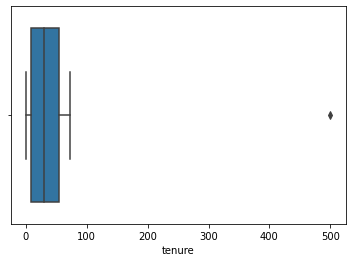

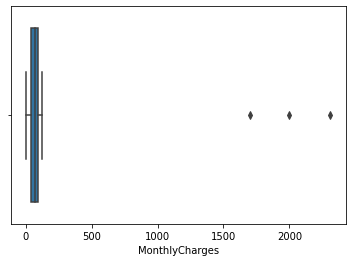

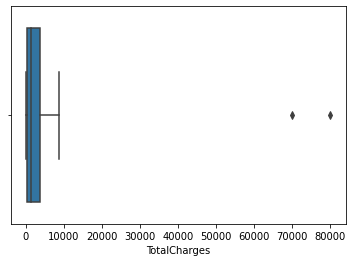

In [27]:
# Import library matplotlib & seaborn
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Tenure
plt.figure()
sns.boxplot(x=copy_outlier['tenure'])
plt.show()

# Monthly Charges
plt.figure()
sns.boxplot(x=copy_outlier['MonthlyCharges'])
plt.show()

# Total Charges
plt.figure()
sns.boxplot(x=copy_outlier['TotalCharges'])
plt.show()

    Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR). Untuk detail jelasnya, bisa dilihat di ilustrasi di bawah ini:

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk me-replace nilai. Tentukan:
Nilai minimum dan maximum data di tolerir
Ubah nilai yang di luar range minimum & maximum ke dalam nilai minimum dan maximum

In [28]:
Q1 = (copy_outlier[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (copy_outlier[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

In [29]:
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64


In [30]:
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)


Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [31]:
more_than = (copy_outlier > maximum)
lower_than = (copy_outlier < minimum)
copy_outlier = copy_outlier.mask(more_than, maximum, axis=1)
copy_outlier = copy_outlier.mask(lower_than, minimum, axis=1)

C:\Users\AHDA\AppData\Local\Temp/ipykernel_9432/2059827200.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (copy_outlier > maximum)
C:\Users\AHDA\AppData\Local\Temp/ipykernel_9432/2059827200.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (copy_outlier < minimum)


In [32]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(copy_outlier[['tenure','MonthlyCharges','TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


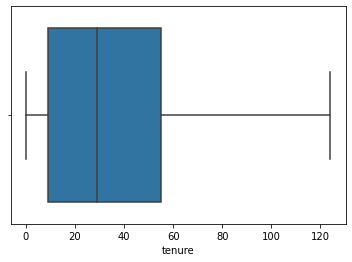

In [33]:
plt.figure()
sns.boxplot(x=copy_outlier['tenure'])
plt.show()

In [34]:
# Kesimpulan
print("Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.")

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.


# 4. Menstandardisasi Nilai dari Variable

    Mendeteksi nilai yang tidak standard
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.

In [35]:
# Variable terakhir yang digunakan copy_outlier
copy_std = copy_outlier.copy()

for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(copy_std[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

    Standarisasi variable kategorik

In [36]:
copy_std = copy_std.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(copy_std[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


In [37]:
copy_std

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [38]:
# Kesimpulan
print("Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:")
print('Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.')
print('Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.')
print('Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.')

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:
Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.


# Membandingkan Data

In [39]:
# Dataset Ori
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [40]:
# Data Final
copy_std

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [41]:
df_load.to_csv('dataset_ori.csv', index=False)
copy_std.to_csv('data_final.csv', index=False)